# Weather Analysis

In [40]:
# Dependencies
import sys
import numpy as np
import pandas as pd
from config import api_key
import json
import requests
import time
import matplotlib.pyplot as plt

In [22]:
# install citypy
sys.path.append('./lib/python3.8/site-packages')

In [23]:
from citipy import citipy

# test the citipy api
city = citipy.nearest_city(36.81964369493615, 11.053632348043188)
print(f"City Name: {city.city_name}, Country Code: {city.country_code}")

City Name: manzil tamim, Country Code: tn


## API Calls:

### CitiPy

In [24]:
# Randomly select at least 500 unique (non-repeat) cities based on latitude and longitude.

# Define min and max longitudes and latitudes. 
# Google says Latitudes range from -90 to 90, and longitudes range from -180 to 180
minlat = -90
maxlat = 90

minlon = -180
maxlon = 180
i = 0

random_cities = {i:["city_name", "country_code", "lat", "lon"]}

print(random_cities[i])


['city_name', 'country_code', 'lat', 'lon']


In [25]:
# loop through latitude and longitude range to pick nearest city and append to dictionary

for lat in np.arange(minlat, maxlat, 7.2):
    for lon in np.arange(minlon, maxlon, 6.4):
        city = citipy.nearest_city(lat, lon)
        cityName = city.city_name
        countryCode = city.country_code
        i = i + 1
        random_cities[i] = [cityName, countryCode, lat, lon]
        

In [26]:
# move into a Dataframe for some checks and duplicates clean up
random_cities_df = pd.DataFrame.from_dict(random_cities, orient='index', columns=random_cities[0])

## remove first row after making it a header
random_cities_df = random_cities_df.iloc[1: , :]
random_cities_df["city_name"].count()

1425

In [27]:
## remove duplicates

random_cities_df = random_cities_df.drop_duplicates(subset=['city_name'])
random_cities_df["city_name"].count()

649

In [28]:
# random_cities_df.head()
# random_cities_df.index
len(random_cities_df['city_name'])

# check for any NaN
random_cities_df = random_cities_df.dropna(how='any')

In [29]:
random_cities_df["city_name"].count()

649

### OpenWeather API

In [30]:
# Perform a weather check on each of the cities using a series of successive API calls.

# set up base url for historical api
# url = f'http://api.openweathermap.org/data/2.5/onecall/timemachine?lat=-90.0&lon=-180.0&dt=1634445108&appid={api_key}'

# Let's try out some calls
# weather_response = requests.get(url)
# weather_json = weather_response.json()
# print(f"The weather API responded with: {weather_json}.")


In [31]:
# try out some json traversal
#print(f"The Temperature for Vaini is : {weather_json['current']['temp']}")

In [32]:
base_url = 'http://api.openweathermap.org/data/2.5/onecall/timemachine?lat='


In [33]:
# loop through the latitude and longitude combinations and get a weather json for each
# Include a print log of each city as it's being processed with the city number and city name
# add 1 second wait time

# get the time code now
now = int (time.time())
print(now)

1634600593


In [34]:
temp = []
humidity = []
cloudiness = []
wind_speed = []

for i in range(len(random_cities_df['city_name'])):
    citylog = random_cities_df.iloc[i, 0]
    lat = random_cities_df.iloc[i, 2]
    lon = random_cities_df.iloc[i, 3]
    query = f'{base_url}{lat}&lon={lon}&dt={now}&appid={api_key}&units=imperial'
    
    try: 
        response = requests.get(query)
        response_json = response.json()
        temp.append(response_json['current']['temp'])
        humidity.append(response_json['current']['humidity'])
        cloudiness.append(response_json['current']['clouds'])
        wind_speed.append(response_json['current']['wind_speed'])
        print(f'{i} - {citylog} processed successfully')
        
        # wait a second
        time.sleep(1)
    
    except:
        print(f'{i} - {citylog} failed')
        pass
    
    

vaini processed successfully
mataura processed successfully
rikitea processed successfully
punta arenas processed successfully
ushuaia processed successfully
hermanus processed successfully
bredasdorp processed successfully
port elizabeth processed successfully
port alfred processed successfully
taolanaro processed successfully
busselton processed successfully
albany processed successfully
new norfolk processed successfully
hobart processed successfully
bluff processed successfully
cape town processed successfully
east london processed successfully
kaitangata processed successfully
avarua processed successfully
mar del plata processed successfully
chuy processed successfully
saint-philippe processed successfully
cidreira processed successfully
souillac processed successfully
portland processed successfully
castro processed successfully
arraial do cabo processed successfully
kruisfontein processed successfully
tsihombe processed successfully
esperance processed successfully
tuatapere pr

biak processed successfully
lorengau processed successfully
kavieng processed successfully
butaritari processed successfully
kapaa processed successfully
cabo san lucas processed successfully
acapulco processed successfully
pochutla processed successfully
acajutla processed successfully
pital processed successfully
ailigandi processed successfully
santa rita processed successfully
barcelona processed successfully
scarborough processed successfully
mana processed successfully
cayenne processed successfully
acarau processed successfully
oussouye processed successfully
fria processed successfully
kolondieba processed successfully
bolgatanga processed successfully
kontagora processed successfully
biu processed successfully
melfi processed successfully
birao processed successfully
abu jubayhah processed successfully
finote selam processed successfully
berbera processed successfully
bargal processed successfully
kavaratti processed successfully
ponnani processed successfully
mullaitivu proce

saint anthony processed successfully
nanortalik processed successfully
tasiilaq processed successfully
grindavik processed successfully
vestmannaeyjar processed successfully
dingle processed successfully
cootehill processed successfully
york processed successfully
leeuwarden processed successfully
bad doberan processed successfully
starogard gdanski processed successfully
eisiskes processed successfully
horki processed successfully
lomintsevskiy processed successfully
kovylkino processed successfully
yelkhovka processed successfully
krasnousolskiy processed successfully
oktyabrskoye processed successfully
krasnoarmeysk processed successfully
kachiry processed successfully
suzun processed successfully
kommunar processed successfully
aginskoye processed successfully
kuytun processed successfully
khuzhir processed successfully
bagdarin processed successfully
amazar processed successfully
zeya processed successfully
zlatoustovsk processed successfully
mnogovershinnyy processed successfully

In [35]:
len(temp)

649

In [37]:
# Consolidate the data into a dataframe 
latitudes = random_cities_df['lat']
longitudes = random_cities_df['lon']

cities_weather = {
    'latitude': latitudes,
    'longitude': longitudes,
    'temperature': temp,
    'humidity': humidity,
    'cloudiness': cloudiness,
    'wind_speed': wind_speed
}
cities_weather_df = pd.DataFrame(cities_weather)
cities_weather_df.head()

,latitude,longitude,temperature,humidity,cloudiness,wind_speed
1,-90.0,-180.0,-51.21,82,11,11.81
3,-90.0,-167.2,-51.21,82,11,11.79
8,-90.0,-135.2,-51.21,82,11,11.79
10,-90.0,-122.4,-51.21,82,11,11.81
15,-90.0,-90.4,-51.21,82,11,11.79


In [38]:
# and save to csv file to cut dependency on api rate restrictions
cities_weather_df.to_csv("cities_weather_df.csv")

## Scatter Plots:

### Scatter plot for Temperature (F) vs. Latitude

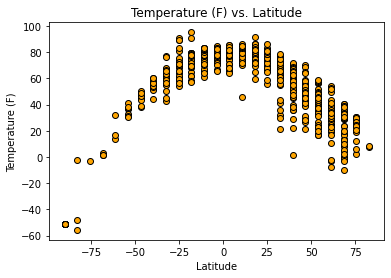

In [49]:

plt.scatter(latitudes, temp, marker="o", facecolors="orange", edgecolors='black')

plt.title("Temperature (F) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")

# plt.savefig("/Images/latitude_temperature.png")
plt.show()

#### Explanation
The scatter follows a clear concave shape centered around the 0 latitude, the equator. The closer to the equator the higher the temperature.

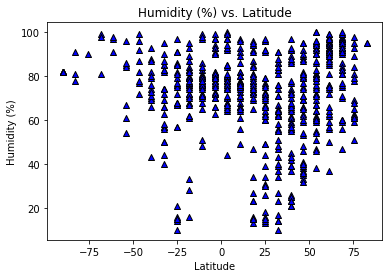

In [50]:
# scatter plot for Humidity (%) vs. Latitude
plt.scatter(latitudes, humidity, marker="^", facecolors="blue", edgecolors='black')

plt.title("Humidity (%) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# plt.savefig("/Images/latitude_temperature.png")
plt.show()

#### Explanation
Latitude does not seem to have an effect on the humidity level but rather the variance of humidity levels. On the equator, most humidity values are clustered on the higher range. 25 degrees above and below the equator tend to see very high to very low humidity levels.

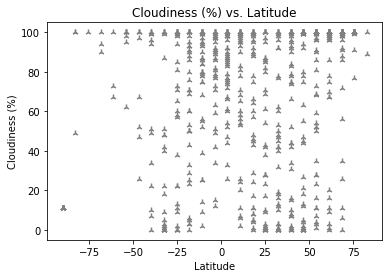

In [51]:
# scatter plot for Cloudiness (%) vs. Latitude
plt.scatter(latitudes, cloudiness, marker="2", facecolors="gray", edgecolors='black')

plt.title("Cloudiness (%) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# plt.savefig("/Images/latitude_temperature.png")
plt.show()

#### Explanation
The markers are concentrated in 3 areas: On the equator, we mostly have high cloud coverage. On the 25degrees line above and below the equator have mostly low cloudiness

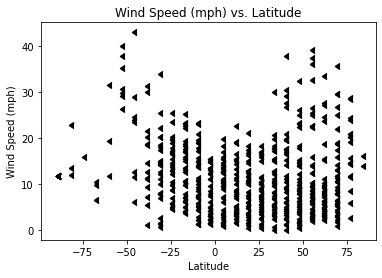

In [52]:
# scatter plot for Wind Speed (mph) vs. Latitude
plt.scatter(latitudes, wind_speed, marker=4, facecolors="black", edgecolors='black')

plt.title("Wind Speed (mph) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# plt.savefig("/Images/latitude_temperature.png")
plt.show()

#### Explanation
The Wind speed data is more clustered around low windspeed in the northern hemisphere with some outliers 

## Linear Regressions:

In [ ]:
# Northern Hemisphere - Temperature (F) vs. Latitude
# Southern Hemisphere - Temperature (F) vs. Latitude

In [ ]:
## Save a CSV of all retrieved data and a PNG image for each scatter plot

In [ ]:
## Analysis

In [ ]:
# Northern Hemisphere - Humidity (%) vs. Latitude
# Southern Hemisphere - Humidity (%) vs. Latitude

In [ ]:
## Save a CSV of all retrieved data and a PNG image for each scatter plot

In [ ]:
## Analysis

In [ ]:
# Northern Hemisphere - Cloudiness (%) vs. Latitude
# Southern Hemisphere - Cloudiness (%) vs. Latitude

In [ ]:
## Save a CSV of all retrieved data and a PNG image for each scatter plot

In [ ]:
## Analysis

In [ ]:
# Northern Hemisphere - Wind Speed (mph) vs. Latitude
# Southern Hemisphere - Wind Speed (mph) vs. Latitude

In [ ]:
## Save a CSV of all retrieved data and a PNG image for each scatter plot

In [ ]:
## Analysis